In [1]:
from data_cleaning import *

In [2]:
df = pd.read_csv('TRAIN100k.csv')

df = data_types(df)
df = missing_values(df)
df = remove_id_column(df)
df = invalid_entries(df)
df = handle_outliers(df)

In [3]:
df.drop(['ind_nuevo','indrel','conyuemp','tipodom'], axis=1, inplace=True)

In [4]:
df.drop(['ind_empleado', 'ult_fec_cli_1t'], axis=1, inplace=True)

In [5]:
df.drop(df.columns[14:-1], axis=1, inplace=True)

In [6]:
df.columns

Index(['pais_residencia', 'sexo', 'age', 'antiguedad', 'tiprel_1mes',
       'indresi', 'indext', 'canal_entrada', 'indfall', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_recibo_ult1'],
      dtype='object')

In [7]:
df.describe()

,age,antiguedad,cod_prov,ind_actividad_cliente,renta,ind_recibo_ult1
count,99316.000000,99316.000000,99230.000000,99316.000000,8.171600e+04,99999.000000
mean,29.409461,36.385597,24.944825,0.410306,1.155589e+05,0.097761
std,10.446588,6.579797,13.646374,0.491892,1.594097e+05,0.296993
min,18.000000,0.000000,1.000000,0.000000,2.539800e+03,0.000000
25%,23.000000,33.000000,11.000000,0.000000,6.217089e+04,0.000000
50%,25.000000,34.000000,28.000000,0.000000,8.961021e+04,0.000000
75%,31.000000,37.000000,36.000000,1.000000,1.330239e+05,0.000000
max,106.000000,157.000000,52.000000,1.000000,2.425324e+07,1.000000


In [8]:
missing = ['pais_residencia', 'sexo', 'age', 'antiguedad', 'tiprel_1mes', 'indresi', 
           'indext', 'canal_entrada', 'indfall', 'cod_prov', 'nomprov', 
           'ind_actividad_cliente', 'renta', 'segmento']

df = df.dropna(subset=missing)

In [9]:
#!pip install opendatasets

In [10]:
import pandas as pd
import data_cleaning
import opendatasets as od
import pandas as pd
import zipfile
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [11]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the categorical columns
categorical_columns = ['sexo', 'tiprel_1mes', 'indext', 'indfall', 'segmento']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Print the DataFrame with label encoded categorical columns
df.head()

,pais_residencia,sexo,age,antiguedad,tiprel_1mes,indresi,indext,canal_entrada,indfall,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_recibo_ult1
0,ES,0,35.0,6.0,0,S,0,KHL,0,29.0,MALAGA,1.0,87218.10,1,0
1,ES,1,23.0,35.0,1,S,1,KHE,0,13.0,CIUDAD REAL,0.0,35548.74,2,0
2,ES,1,23.0,35.0,1,S,0,KHE,0,13.0,CIUDAD REAL,0.0,122179.11,2,0
3,ES,0,22.0,35.0,1,S,0,KHD,0,50.0,ZARAGOZA,0.0,119775.54,2,0
5,ES,0,23.0,35.0,1,S,0,KHE,0,45.0,TOLEDO,0.0,22220.04,2,0


In [12]:
X = df[['sexo', 'age', 'antiguedad', 'tiprel_1mes','indext','indfall', 'cod_prov',
        'ind_actividad_cliente', 'renta', 'segmento']]
y = df['ind_recibo_ult1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Initialize with class weights
model = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})

# Train
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14662
           1       0.44      0.21      0.29      1681

    accuracy                           0.89     16343
   macro avg       0.68      0.59      0.62     16343
weighted avg       0.87      0.89      0.87     16343



We ended up only using ONE target column, instead of all 24. I can't compare this with my previous project as I had included multiple target columns.

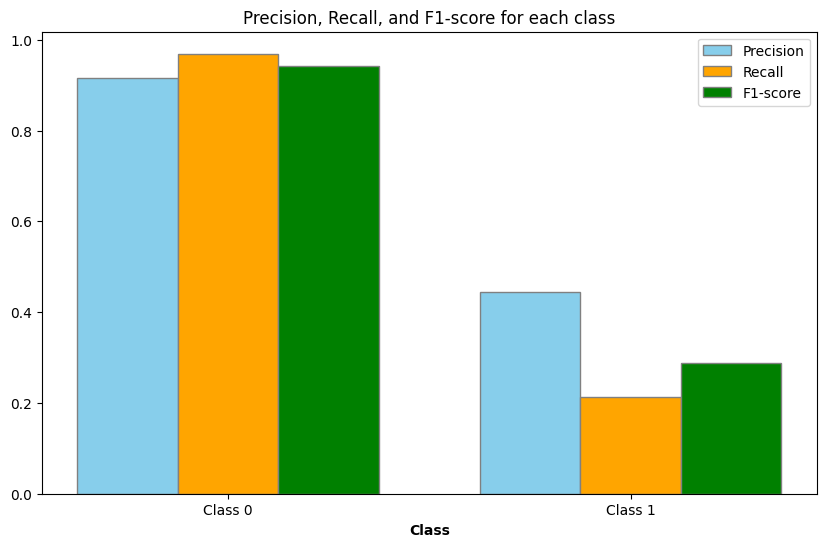

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have already computed and printed the classification report
classification_results = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [classification_results[str(i)]['precision'] for i in range(len(classification_results) - 3)]
recall = [classification_results[str(i)]['recall'] for i in range(len(classification_results) - 3)]
f1_score = [classification_results[str(i)]['f1-score'] for i in range(len(classification_results) - 3)]

# Define classes
classes = ['Class 0', 'Class 1']

# Set width of bars
bar_width = 0.25

# Set position of bars on X axis
r1 = np.arange(len(precision))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='skyblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='orange', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='green', width=bar_width, edgecolor='grey', label='F1-score')

# Add xticks on the middle of the group bars
plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(precision))], classes)

# Add title and legend
plt.title('Precision, Recall, and F1-score for each class')
plt.legend()

# Show plot
plt.show()
